In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random as rnd
from sklearn import preprocessing
import random
from operator import itemgetter

#Para BFS
from collections import deque

<h1>Módulo 4: Redes<h4>

<h3>1. Creación del Grafo</h3>
<blockquote>Lo primero que hacemos es levantar el archivo data.csv para identificar los nombres del autor y coautur/es.</blockquote>

In [2]:
path_to_data = "data.csv"
data = open(path_to_data,'r')
all_lines = data.readlines()
data.close()

In [3]:
all_lines[0]

'1992, B368,  Nucl.Phys., Horne & Horowitz,  Exact Black String Solutions in Three Dimensions\n'

<blockquote><b>Obs:</b> El formato parace ser: 
<br>"Fecha, unCodigo, unlugar, varios Autores/Coautores, unNombreDePublicacion"
<br>Sólo nos interesan los autores/coautores.</blockquote>

In [4]:
G = nx.Graph()

def strip_withou_space(aString):
    return str.strip(aString).replace(" ", "")

## Every authour/coauthor is a node.
##This is a way to map from names to numbers that represent the index of the node in our graph.
name_to_node_index = {}

## Every co-authorship is an edges of our graph.
edges = set()

for a_pub_info in all_lines:    
    pub_split = a_pub_info.split(",")[3]
    list_of_authors = pub_split.split("&")
    names_in_this_pub = list( map(strip_withou_space, list_of_authors) )
    
    for name in names_in_this_pub:
        if name not in name_to_node_index:
            name_to_node_index[name] = len(name_to_node_index)+1
    
    nodes_to_connect = [name_to_node_index[name] for name in names_in_this_pub]
    K = nx.complete_graph(nodes_to_connect)
    G.add_edges_from(K.edges)
    G.add_nodes_from(K) # if there is only one author, you add K1. K1 has no edge.

In [5]:
print ( "Cantidad de nodos en el grafo: {}".format(G.number_of_nodes()) )
print ( "Cantidad de ejes en el grafo: {}".format(G.number_of_edges()) )

Cantidad de nodos en el grafo: 4027
Cantidad de ejes en el grafo: 7977


<h3>Primer vista del grafo</h3>
<blockquote>Hechemos un vistazo del lag que tiene para dibujar esto</blockquote>

In [6]:
def plot_this_graph(graph, g_label, color='red'):
    plt.clf()
    plt.figure(1,figsize=(70,20))
    plt.axis('off')
    nx.draw_networkx(graph, node_color=color, pos=nx.spring_layout(graph),node_shape="o", node_size=5, with_labels=False, edge_color='grey')
    plt.show()

<blockquote>
El grafo es lo suficientemente grande en cantidad de aristas y ejes como para no llegar a divisar las aristas entre muchos nodos. Para intentar plotear una imagen donde esto no pase, se sacarán los nodos de grado 0 y 1, y del resto nos quedaremos con el 15% aleatoriamente de los nodos.
</blockquote>

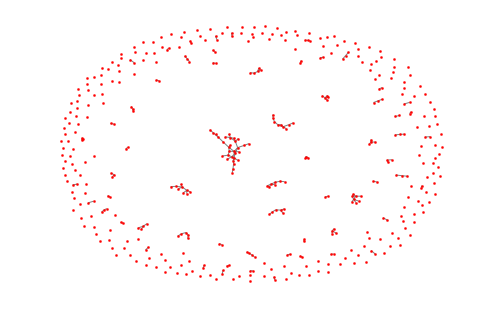

In [7]:
K = G.copy()
K.remove_nodes_from([ n for n,d in K.degree() if d == 0 or d == 1])
sample = random.sample(K.nodes(), int(len(K.nodes())*0.85))
K.remove_nodes_from(sample)
plot_this_graph(K, "Ploteo grafo original")

<blockquote>
El proceso cumplió el objetivo de permitir divisar mejor las aristas entre los nodos pero de todas formas no sirve para obtener una idea significativa de la forma del grafo. Seguimos encontrando muchos nodos sueltos dispersos (que en realidad tienen grado 2 o más) y no queda clara la existencia de la componente gigante de la que más adelante hablaremos.
</blockquote>

<h3>2. Distribución de Grado</h3>
<blockquote>Grafique la distribución del grado de los autores, en escalas lineales, semilogarítmica y log-log. Argumente, a partir de los gráficos, de qué tipo de distribución se trata.</blockquote>

<blockquote>
<b>Obs:</b> Agruparemos en bins para que la curva sea más suave y se distinga mejor la distribución. Elegimos 50 en base a los grados máximos que encontramos en el grafo.
</blockquote>

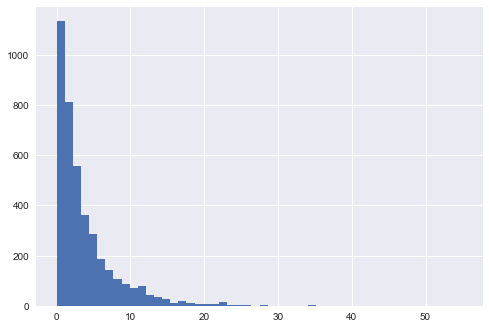

In [8]:
y = [n[1] for n in nx.degree(G)]
plt.clf()
ax1 = plt.hist(y, bins = 50)
x = ax1[0]
sns.plt.show()

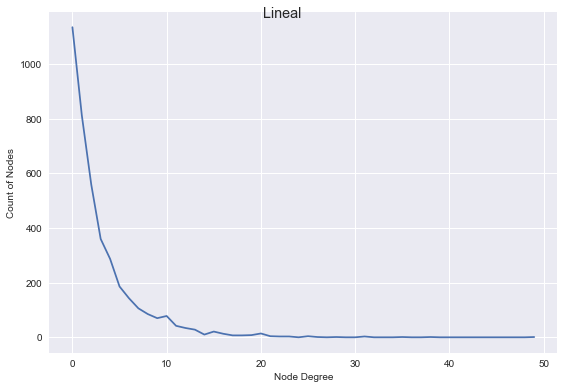

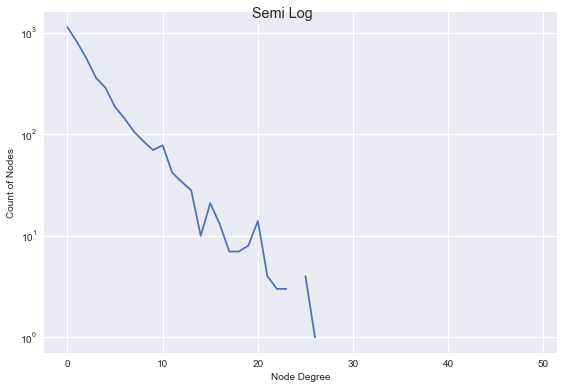

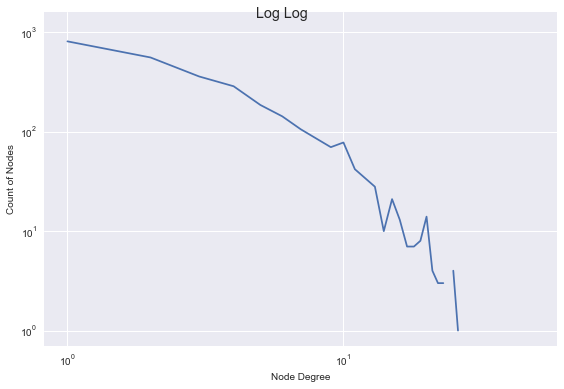

In [9]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.plot(x)
ax1.set_xlabel('Node Degree', fontsize=10)
ax1.set_ylabel('Count of Nodes', fontsize=10)
plt.suptitle("Lineal")
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.semilogy(x)
ax1.set_xlabel('Node Degree', fontsize=10)
ax1.set_ylabel('Count of Nodes', fontsize=10)
plt.suptitle("Semi Log")
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.loglog(x)
ax1.set_xlabel('Node Degree', fontsize=10)
ax1.set_ylabel('Count of Nodes', fontsize=10)
plt.suptitle("Lineal")
plt.suptitle("Log Log")
plt.tight_layout()
plt.show()

<blockquote>
<ul>
<li>Con el primer gráfico no podemos a priori decir tan fácil con que distribución nos encontramos.</li>
<li>El tercer gráfico nos indica que no se corresponde con una ley de potencias (debería ser parecido a una recta).</li>
<li>De ser una distribución exponencial en el segundo gráfico deberíamos observar una recta y es lo que estamos encontrando (si lo miramos con un poco de cariño).</li>
</ul>
<br>
Concluímos que la distribución de los grados de los nodos del grafo se corresponde con una distribución exponencial.
</blockquote>

<h3>3. Componentes Conexas</h3>
<blockquote>Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor, o componente gigante.</blockquote>

In [10]:
print( "Es grafo es conexo." if nx.is_connected(G) else "El grafo no es conexo." )
print( "La cantidad de compontes conexas es {}.".format(nx.number_connected_components(G)) )
giant_component = max(nx.connected_component_subgraphs(G), key=len)
print( "La componente gigante tiene {} nodos.".format(giant_component.number_of_nodes()) )

El grafo no es conexo.
La cantidad de compontes conexas es 532.
La componente gigante tiene 3048 nodos.


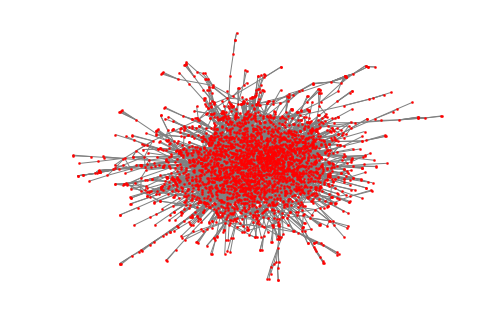

In [11]:
plot_this_graph(giant_component, "Ploteo de la componente gigante")

<h3>4. Tamaños de Vecindades</h3>
<blockquote>Trabajando con la componente gigante del grafo, estudie, parándose en un nodo al azar, cómo aumenta el número de autores alcanzados a medida que se aleja del nodo semilla. Grafique el número de autores alcanzados en función de la distancia al nodo semilla. Grafique también el número de nuevos autores que se agregan en cada paso, y estime el máximo de esta función. Pruebe con varios nodos semillas y analice la robustez de este resultado. Discuta el significado de los gráficos y su relación con el fenómeno de seis grados de separación.</blockquote>

In [12]:
def acum_prev_values_over_array_index(_values):
    acum = 0
    for index,val in enumerate(_values):
        acum += val 
        _values[index] = acum
    return

## Common BFS counting at each depth:
#####"how many nodes are at the next depth of the bfs tree?" (this are the nodes that we havent visited yet)
#####"using the nodes at the actual depth, how many nodes can we visit?"

n_repeat = 100
nodes_seeds = [ rnd.choice(np.array(giant_component.nodes)) for _ in range(n_repeat) ]
results_authors_that_can_be_visited_in_func_of_depth = []
results_new_nodes_in_func_of_depth = []

for a_node in nodes_seeds:    
    a_bfs_tree = nx.bfs_tree(giant_component, a_node)
    tree_length = len(nx.dag_longest_path(a_bfs_tree))+1
    
    visited_sets = np.array([set() for _ in range(tree_length)])
    acum_authors_visited_in_func_of_depth = np.zeros((tree_length))
    new_authors_in_func_of_depth = np.zeros((tree_length))

    d = deque([(0,a_node)])
    while len(d) != 0:
        (depth,node) = d.pop()
        depth += 1

        #Nodes in next step weren't visited
        node_neighbors = list(nx.neighbors(a_bfs_tree, node))
        new_authors_in_func_of_depth[depth] += len(node_neighbors)
        
        #How many authors we have visited at this depth
        visited_sets[depth].update(node_neighbors)
        acum_authors_visited_in_func_of_depth[depth] = len(visited_sets[depth])
        
        #Next step
        for ng in node_neighbors:
            d.appendleft((depth,ng))
        
    acum_prev_values_over_array_index(acum_authors_visited_in_func_of_depth)
    
    results_authors_that_can_be_visited_in_func_of_depth.append(list(map(int, acum_authors_visited_in_func_of_depth)))
    results_new_nodes_in_func_of_depth.append(list(map(int, new_authors_in_func_of_depth)))

In [13]:
size_max = len(max( [max(results_authors_that_can_be_visited_in_func_of_depth,key=len),
      max(results_new_nodes_in_func_of_depth,key=len)]
   ))

for index, an_array in  enumerate(results_authors_that_can_be_visited_in_func_of_depth):
    results_authors_that_can_be_visited_in_func_of_depth[index] = np.pad(an_array,(0,size_max-len(an_array)),mode='constant', constant_values=(3047))
        
for index, an_array in  enumerate(results_new_nodes_in_func_of_depth):
    results_new_nodes_in_func_of_depth[index] = np.pad(an_array,(0,size_max-len(an_array)),'constant')

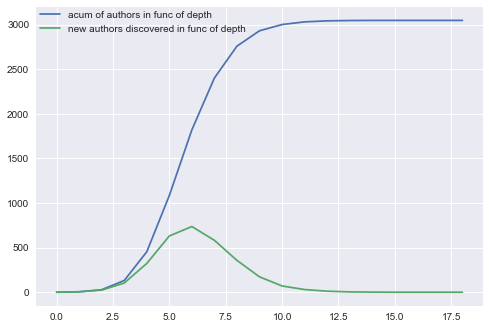

In [ ]:
scaler = preprocessing.StandardScaler().fit(results_authors_that_can_be_visited_in_func_of_depth)
other_scaler = preprocessing.StandardScaler().fit(results_new_nodes_in_func_of_depth)

plt.clf()
line_up, = plt.plot(scaler.mean_, label='acum of authors in func of depth')
line_down, = plt.plot(other_scaler.mean_, label='new authors discovered in func of depth')
plt.legend(handles=[line_up, line_down],loc=2, borderaxespad=0.)
plt.show()

<blockquote>
<b>Observación:</b>
Si nos preguntaran la distancia entre dos nodos de nuestro grafo, este resultado nos apoya a responder que se encuentran a distancia 6 o ~6 (muy cercano a 6). También nos dice que en promedio todos los autores se encuentran a menos de distancia 10 de otros autores.
</blockquote>

<h3>5. Mundos Pequeños</h3>
<blockquote>
    <p>Compute el coeficiente de clustering C y el camino mínimo medio l para la componente gigante. Genere un grafo aleatorio con la misma distribución de grado y compute las mismas medidas para este grafo. Compare e interprete los resultados. ¿Se trata de un grafo con estructura de mundos pequeños?</p>
</blockquote>

In [ ]:
# average_shortest_path_length se demora bastante: tiene sentido siendo floyd+promedio_entre_cada_camino 
def get_trans_avg_clustering_coef_and_avg_shortest_path_length_of_this_graph(_g):
    _g_trans = nx.transitivity(_g)
    _g_exact_mean_clust = nx.average_clustering(_g, nodes=_g.nodes)
    _g_mean_spl = nx.average_shortest_path_length(_g)
    return _g_trans, _g_exact_mean_clust, _g_mean_spl

gc_t, gc_c, gc_spl = get_trans_avg_clustering_coef_and_avg_shortest_path_length_of_this_graph(giant_component)
print ("Transitividad: {}".format(gc_t))
print ("Coeficiente de clustering exacto: {}".format(gc_c))
print ("Cámino mínimo medio: {}".format(gc_spl))

<blockquote>
Utilizaremos diferentes generadores de grafos:
    <ul>
        <li>watts_strogatz_graph: para generar grafos del tipo mundo-pequeño a partir la media de los grados.</li>
        <li>connected_watts_strogatz_graph: igual al anterior pero con la obligación de ser conexo.</li>
        <li>random_degree_sequence_graph: para generar grafos randoms a partir de una sequencia de grados</li>
    </ul>
    <br>
    <p>
       Si el grafo generado no es conexo existirán al menos dos nodos para los cuales el camino mínimo entre ellos tiene distancia infinita perdiendo así el sentido de nuestras medidas de clustering y camino mínimo medio.
       Una alternativa es seguir generando grafos hasta obtener un grafo conexo, aunque quizás esto podría no ser viable. Si esto no es viable desde un punto de vista computacional, otra alternativa es quedarnos con la componente gigante de este grafo no conexo generado.
    </p>
</blockquote>

<blockquote>
    Los resultados indican que para asegurarnos conseguir un grafo conexo necesitamos una cantidad alta de repeticiones. Lo que lo convierte en un proceso inviable computacionalmente para ejecutar en un tiempo prudente. En caso de no generar un grafo conexo, usaremos su componente gigante.
</blockquote>

In [ ]:
# Al momento de generar un grafo uno de los posibles parámetros es el degree en promedio
gc_degree_sequence = [n[1] for n in nx.degree(giant_component)]
gc_list_of_degres = nx.degree_histogram(giant_component)
gc_mean_degree = int(np.array([k_degree*nodes_count for k_degree, nodes_count in enumerate(gc_list_of_degres)]).sum()/np.array(gc_list_of_degres).sum())
gc_n_c = giant_component.number_of_nodes()

In [ ]:
def random_degree_sequence_graph_connected(_seq, _tries=25):
    _G = nx.random_degree_sequence_graph(_seq)
    _gc_max = None
    
    while _tries > 0 and not nx.is_connected(_G):
        _G = nx.random_degree_sequence_graph(_seq)
        _gc_max_aux = max(nx.connected_component_subgraphs(_G), key=len)
        if _gc_max is None or len (_gc_max) < len(_gc_max_aux):
            _gc_max = _gc_max_aux
        _tries -= 1
    
    if not nx.is_connected(_G):
        print("No se consiguió algo conexo en 50 intentos")
        _G = _gc_max
        
    return _G
                                
con_ws_info = []
rds_info = []
_repeats = 10
for _ in range(_repeats):
    _p = np.random.uniform(low=0.0, high=1.0, size=None)
    num = 0
    for _g, _list in [(nx.connected_watts_strogatz_graph(gc_n_c, gc_mean_degree, _p, tries=100), con_ws_info),\
                      (random_degree_sequence_graph_connected(gc_degree_sequence), rds_info)]:
        print (num)
        num+=1
        try:
            _g_t, _g_c, _g_spl = get_trans_avg_clustering_coef_and_avg_shortest_path_length_of_this_graph(_g)
            _list.append((_g_t, _g_c, _g_spl))
        except:
            # if graph is not connected the measures have no sense
            continue

<blockquote>
<b>Def:</b> A graph is considered small-world, if its average local clustering coefficient C is significantly higher than a random graph constructed on the same vertex set, and if the graph has approximately the same mean-shortest path length as its corresponding random graph.
</blockquote>

In [ ]:
arrays_index = [
    ['Giant Component','Connected SW Small-World','Random Graph']
]
index = pd.MultiIndex.from_arrays(arrays_index, names=["tipo"])

arrays_columns = [
    ['Transitivity','Avg Clustering Coef','Avg Shortest Path Length']
]
index_columns = pd.MultiIndex.from_arrays(arrays_columns, names=["Métricas"])

_values = np.array([(gc_t, gc_c, gc_spl)]+con_ws_info+rds_info)

df = pd.DataFrame(data=_values, index=index, columns=index_columns)
print(df)

<blockquote>
    <p>
    El coeficiente de clustering es más alto incluso que las instancias random generadas utilizando el método de la librería para generar grafos de "mundo pequeño" y su camino mínimo medio es de aproximadamente el mismo.
    En el caso de los grafos randoms tiene sentido haber obtenido un valor camino mínimo medio más bajo dado que la componente gigante tiene menos nodos y con se necesitan muchas repeticiones hasta obtener un grafo conexo.
    </p>
    <p>
        Concluimos que se cumplen las condiciones necesarias para asumir que es un grafo de mundo pequeño.
    </p>
</blockquote>

<h3>6. Estrellas</h3>
<blockquote>
    <p>Discuta cómo haría para individuar a los autores “estrella” del campo. Evalúe quiénes son estos autores según por lo menos dos métricas diferentes. Analice qué sucedería con la comunidad si estos autores desapareciesen. En particular, determine cuántos autores deberían desaparecer para que desaparezca la componente gigante del grafo.</p>
</blockquote>

<blockquote>
    Para individuar los autores "estrella" del campo utilizaremos tres métricas vistas en clase:
    <ul>
        <li>betwenness: número de caminos mínimos medios que pasan por el nodo.</li>
        <li>degree</li>
    </ul>
    <br>
    <p>
        <b>Observación:</b> en algún momento se quiso ver los resultados obtenidos utilizando katz pero al no converger con a lo sumo 2000 iteraciones se ignoró.
    </p>
</blockquote>

In [ ]:
gc_btw = nx.betweenness_centrality(giant_component, normalized=True)
#Ya viene normalizado
gc_deg = nx.degree_centrality(giant_component)

In [ ]:
distance_btw_deg = {}
for node in giant_component.nodes():
    distance_btw_deg[node] = gc_btw[node] + gc_deg[node]

In [ ]:
plt.figure(1,figsize=(60,30))
plt.axis('off')
nx.draw_networkx(giant_component, node_color=list(gc_btw.values()),cmap=plt.cm.Oranges, label="Closeness-Betweenness-Degree-Katz distance", pos=nx.spring_layout(giant_component),node_shape="o", node_size=100, with_labels=False, edge_color='grey')
plt.show()

In [ ]:
plt.figure(1,figsize=(60,30))
plt.axis('off')
nx.draw_networkx(giant_component, node_color=list(gc_deg.values()),cmap=plt.cm.Oranges, label="Closeness-Betweenness-Degree-Katz distance", pos=nx.spring_layout(giant_component),node_shape="o", node_size=100, with_labels=False, edge_color='grey')
plt.show()

<blockquote>
    Para analizar la cantidad de autores que deberían desaparecer para que deje de existir la componente gigante se debe establecer un punto de corte, el punto en el cual se considera que ya no "existe" la compontente gigante.
    En este caso se considerará como punto de corte cuando se obtienen todas componentes conexas con un tamaño menor a |Componente Gigante|/4. 
</blockquote>

In [ ]:
#Supongo que sigue hacer un dendograma y listo

<blockquote>
    Podemos variar un poco este punto de corte y ver cual sería la cantidad que necesitaríamos.
</blockquote>

In [ ]:
def condicion_corte_con_tamaño_menor_a(_number):
    def continue_splitting(_g):
        return _number <= len(_g.nodes)
    return continue_splitting

def cantidad_autores_quitados(_init_graph, _continue_splitting, _centraliy_alg):
    _cant_autores_extraidos = 0
    d = deque([_init_graph])

    while len(d) != 0:
        _g = d.pop()
        if(len(_g.nodes) > 1):
            _nodo, _valor = max(_centraliy_alg(_g).items(), key=itemgetter(1))
            _g.remove_node(_nodo)
            _cant_autores_extraidos+=1

            for _comp in nx.connected_component_subgraphs(_g):
                if _continue_splitting(_comp):
                    d.appendleft((_comp))
    
    return _cant_autores_extraidos

res_degre = []
res_betw = []
res_clos = []

for _name, _ds, _centrality_alg in [(res_degre,nx.degree_centrality),(res_betw,nx.betweenness_centrality),(res_clos,nx.closeness_centrality)]:
    for _i in range(2,8,2):
        _split_condition = condicion_corte_con_tamaño_menor_a(len(giant_component.nodes)/_i)
        _ds.append(cantidad_autores_quitados(giant_component.copy(),_split_condition,_centrality_alg))

In [ ]:
arrays_columns = [
    ['Closeness','Betweenness','Degree']
]
index_columns = pd.MultiIndex.from_arrays(arrays_columns, names=["Centralidad"])

arrays_rows = [
    ["{}".format(index) for index in range(2,8,2)]
]
index_rows = pd.MultiIndex.from_arrays(arrays_rows, names=["Corte en |Componente Gigante|/num"])

_values = []
for i in range(len(res_clos)):
    _values.append([res_clos[i], res_betw[i], res_degre[i]])

df = pd.DataFrame(data=_values, index=index_rows, columns=index_columns)
print(df)


Escribir alguna conclusión cuando termine de correr